In [1]:
# Uncomment for development/debugging
%matplotlib inline
import matplotlib.pyplot as plt

# Uncomment to plot nice-looking final figures
"""
import matplotlib as mpl

mpl.style.use('classic')
mpl.use("pgf")
pgf_with_custom_preamble = {
    "font.family": "serif", # use serif/main font for text elements
    "text.usetex": True,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{unicode-math}",  # unicode math setup
         "\\setmainfont{Doulos SIL}" # serif font via preamble
         ]
}
mpl.rcParams.update(pgf_with_custom_preamble)
"""

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fname = './output/data_100N.csv'
df100 = pd.read_csv(fname)
# del df['Unnamed: 0']
df100.type = df100['type'].map({'known':'orig', 'new':'noisy'})

In [3]:
fname = './output/data_200N.csv'
df200 = pd.read_csv(fname)
# del df['Unnamed: 0']
df200.type = df200['type'].map({'known':'orig', 'new':'noisy'})

In [4]:
fname = './output/data_500N.csv'
df500 = pd.read_csv(fname)
# del df['Unnamed: 0']
df500.type = df500['type'].map({'known':'orig', 'new':'noisy'})

In [5]:
np.sort(df100.n.unique())

array([ 16,  32,  64, 128, 256, 512])

# ARTIFICIAL Vectors corrupted by d% change - ERROR NUM

## N=100, p=[0.05, 0.1, 0.2], d=[0.01, 0.05, 0.5,  0.75, 1]

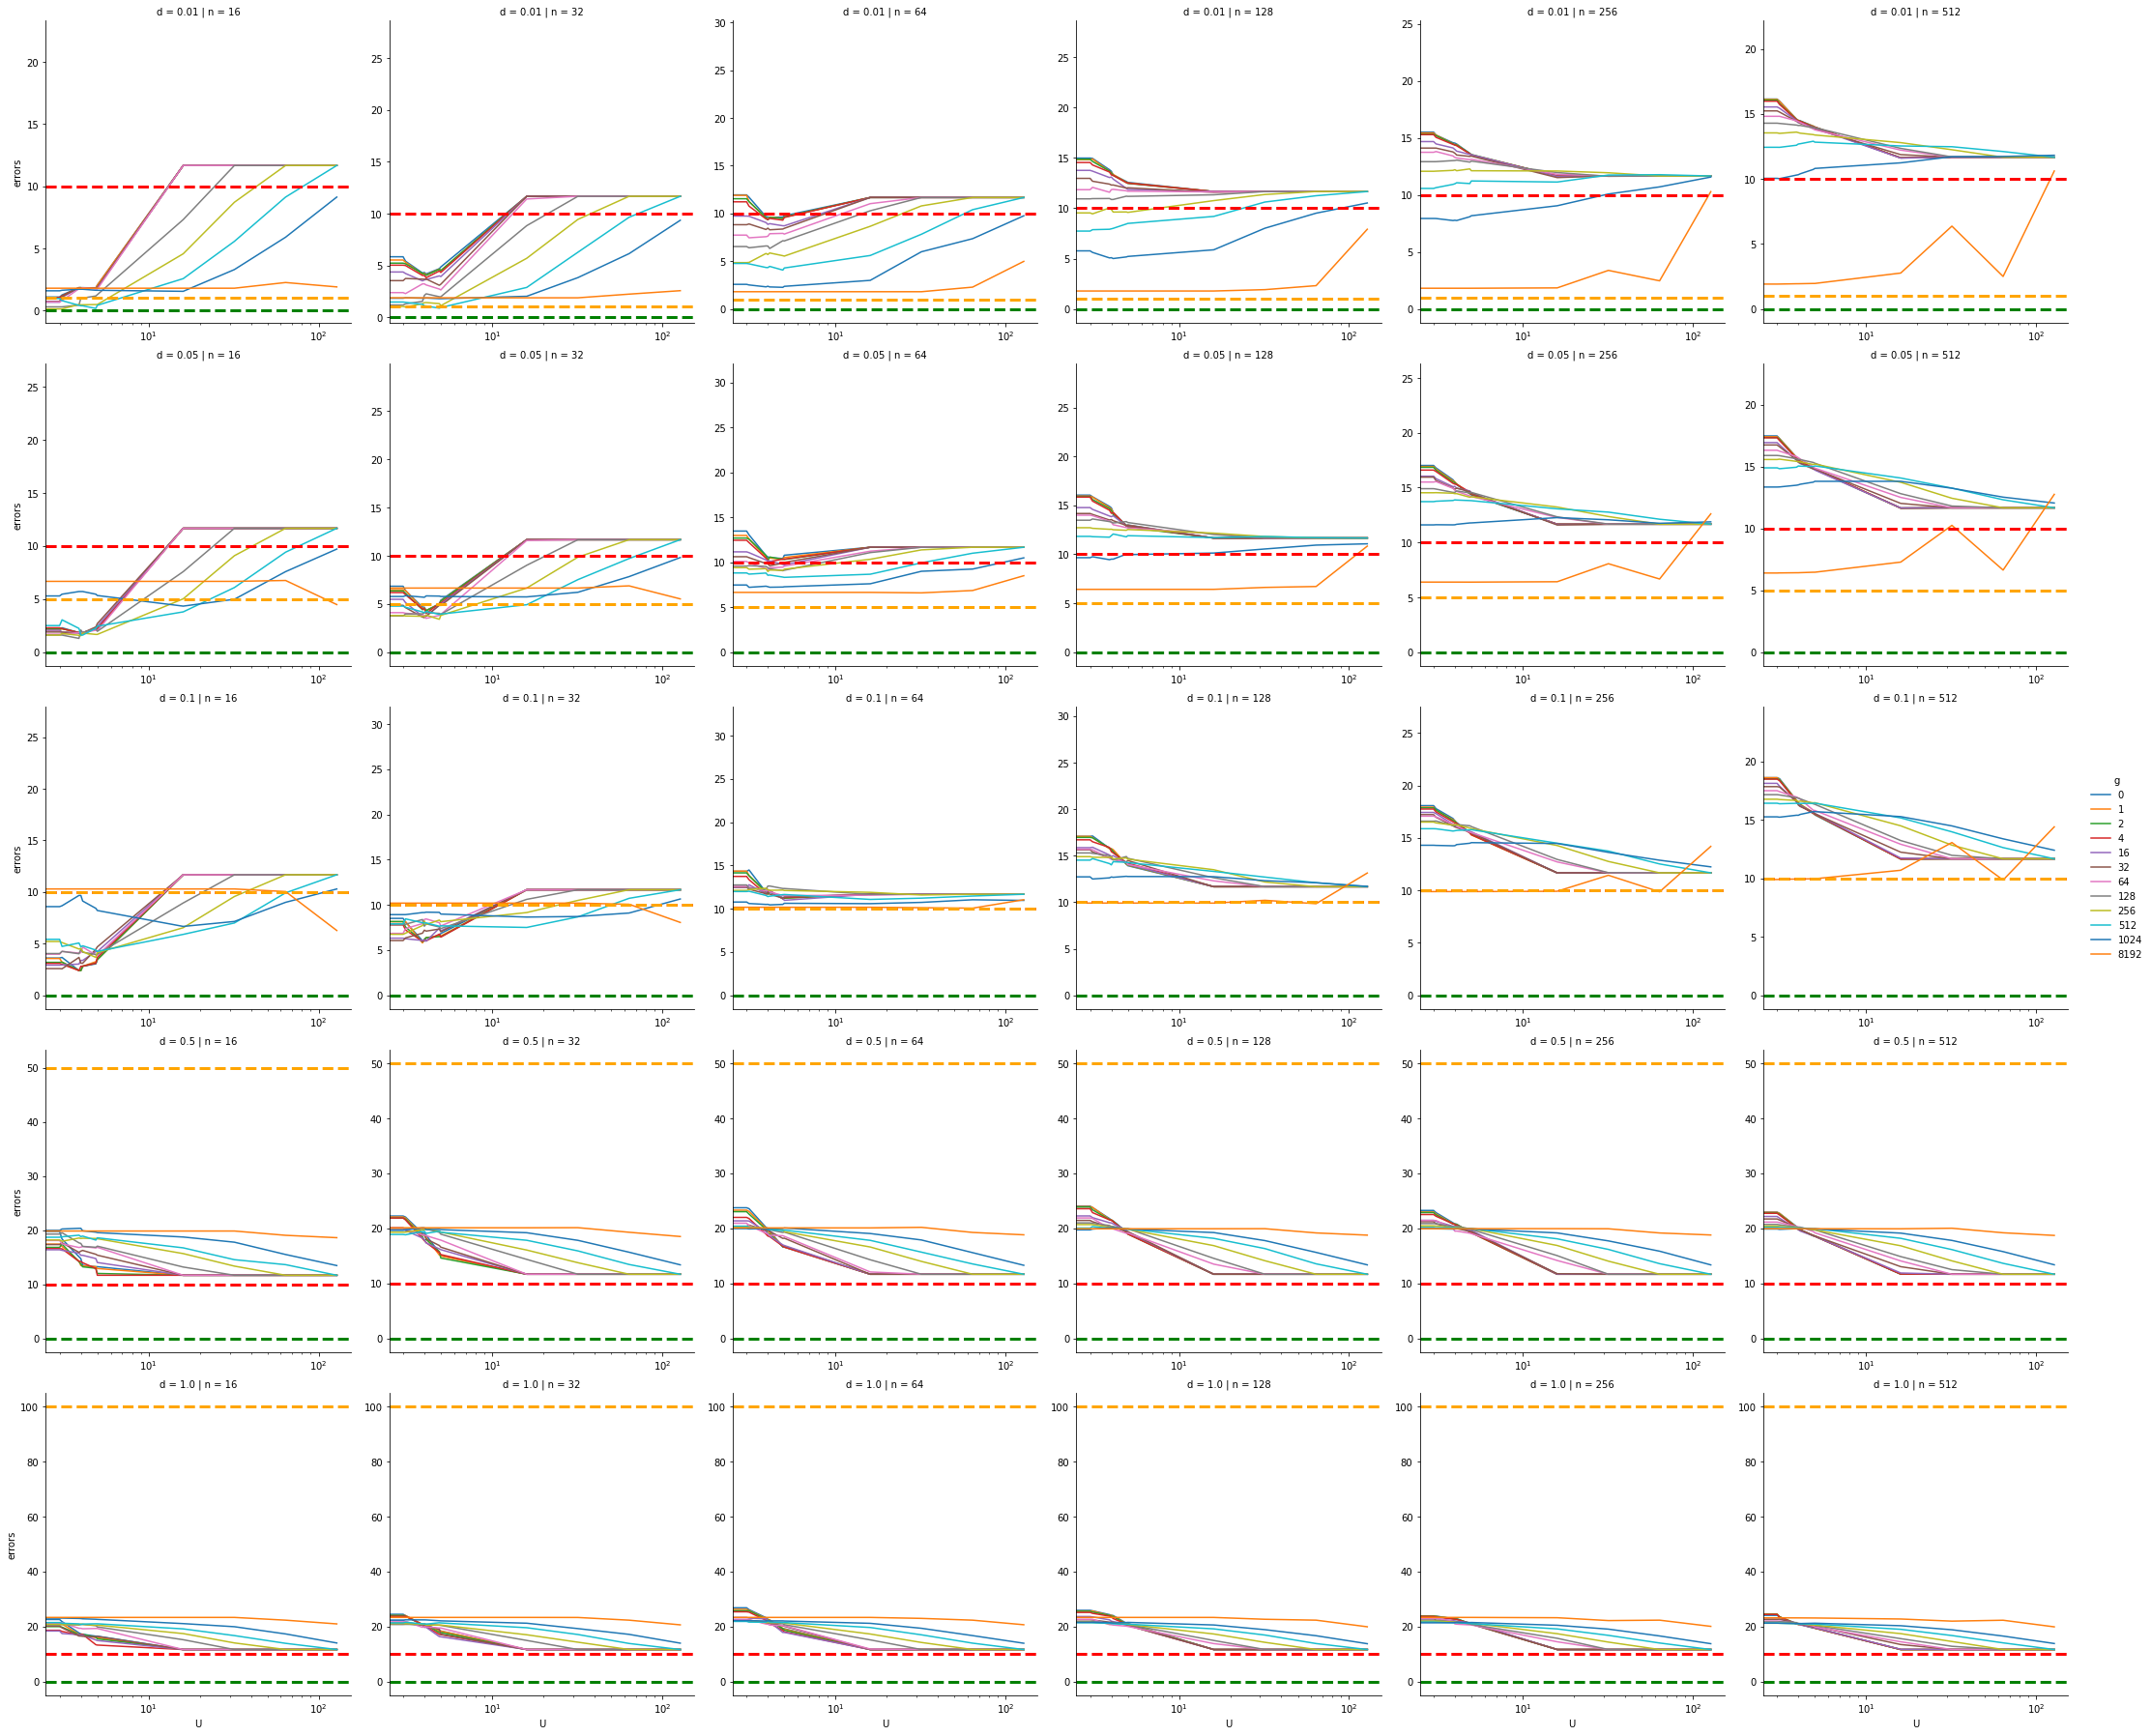

In [6]:
p_fixed = 0.1
N_fixed = 100
d_fixed = 0.5

df100_ = df100[(df100.type == "noisy") & (df100.n > 15)]

g = sns.relplot(x='U', y='errors', hue='g', col='n', row='d', data=df100_, kind='line', facet_kws={'sharey': False, 'sharex': False}, ci=None, palette="tab10")
N = set(df100_.N)
n = set(df100_.n)
d = set(df100_.d)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))

for i in range(len(d)):
    for j in range(len(n)):
        
        g.axes[i,j].set_xscale('log')
        g.axes[i,j].axhline(N_fixed*p_fixed, ls='--', linewidth=3, color='red') #max error if 10% active vals are displaced
        g.axes[i,j].axhline(0, ls='--', linewidth=3, color='green') #0 error
        g.axes[i,j].axhline(d[i]*N_fixed, ls='--', linewidth=3, color='orange') #d

# print all couples u&g with lowest error, print all others not too far

## N=200, p=[0.05, 0.1, 0.2], d=[0.01, 0.05, 0.5, 1]

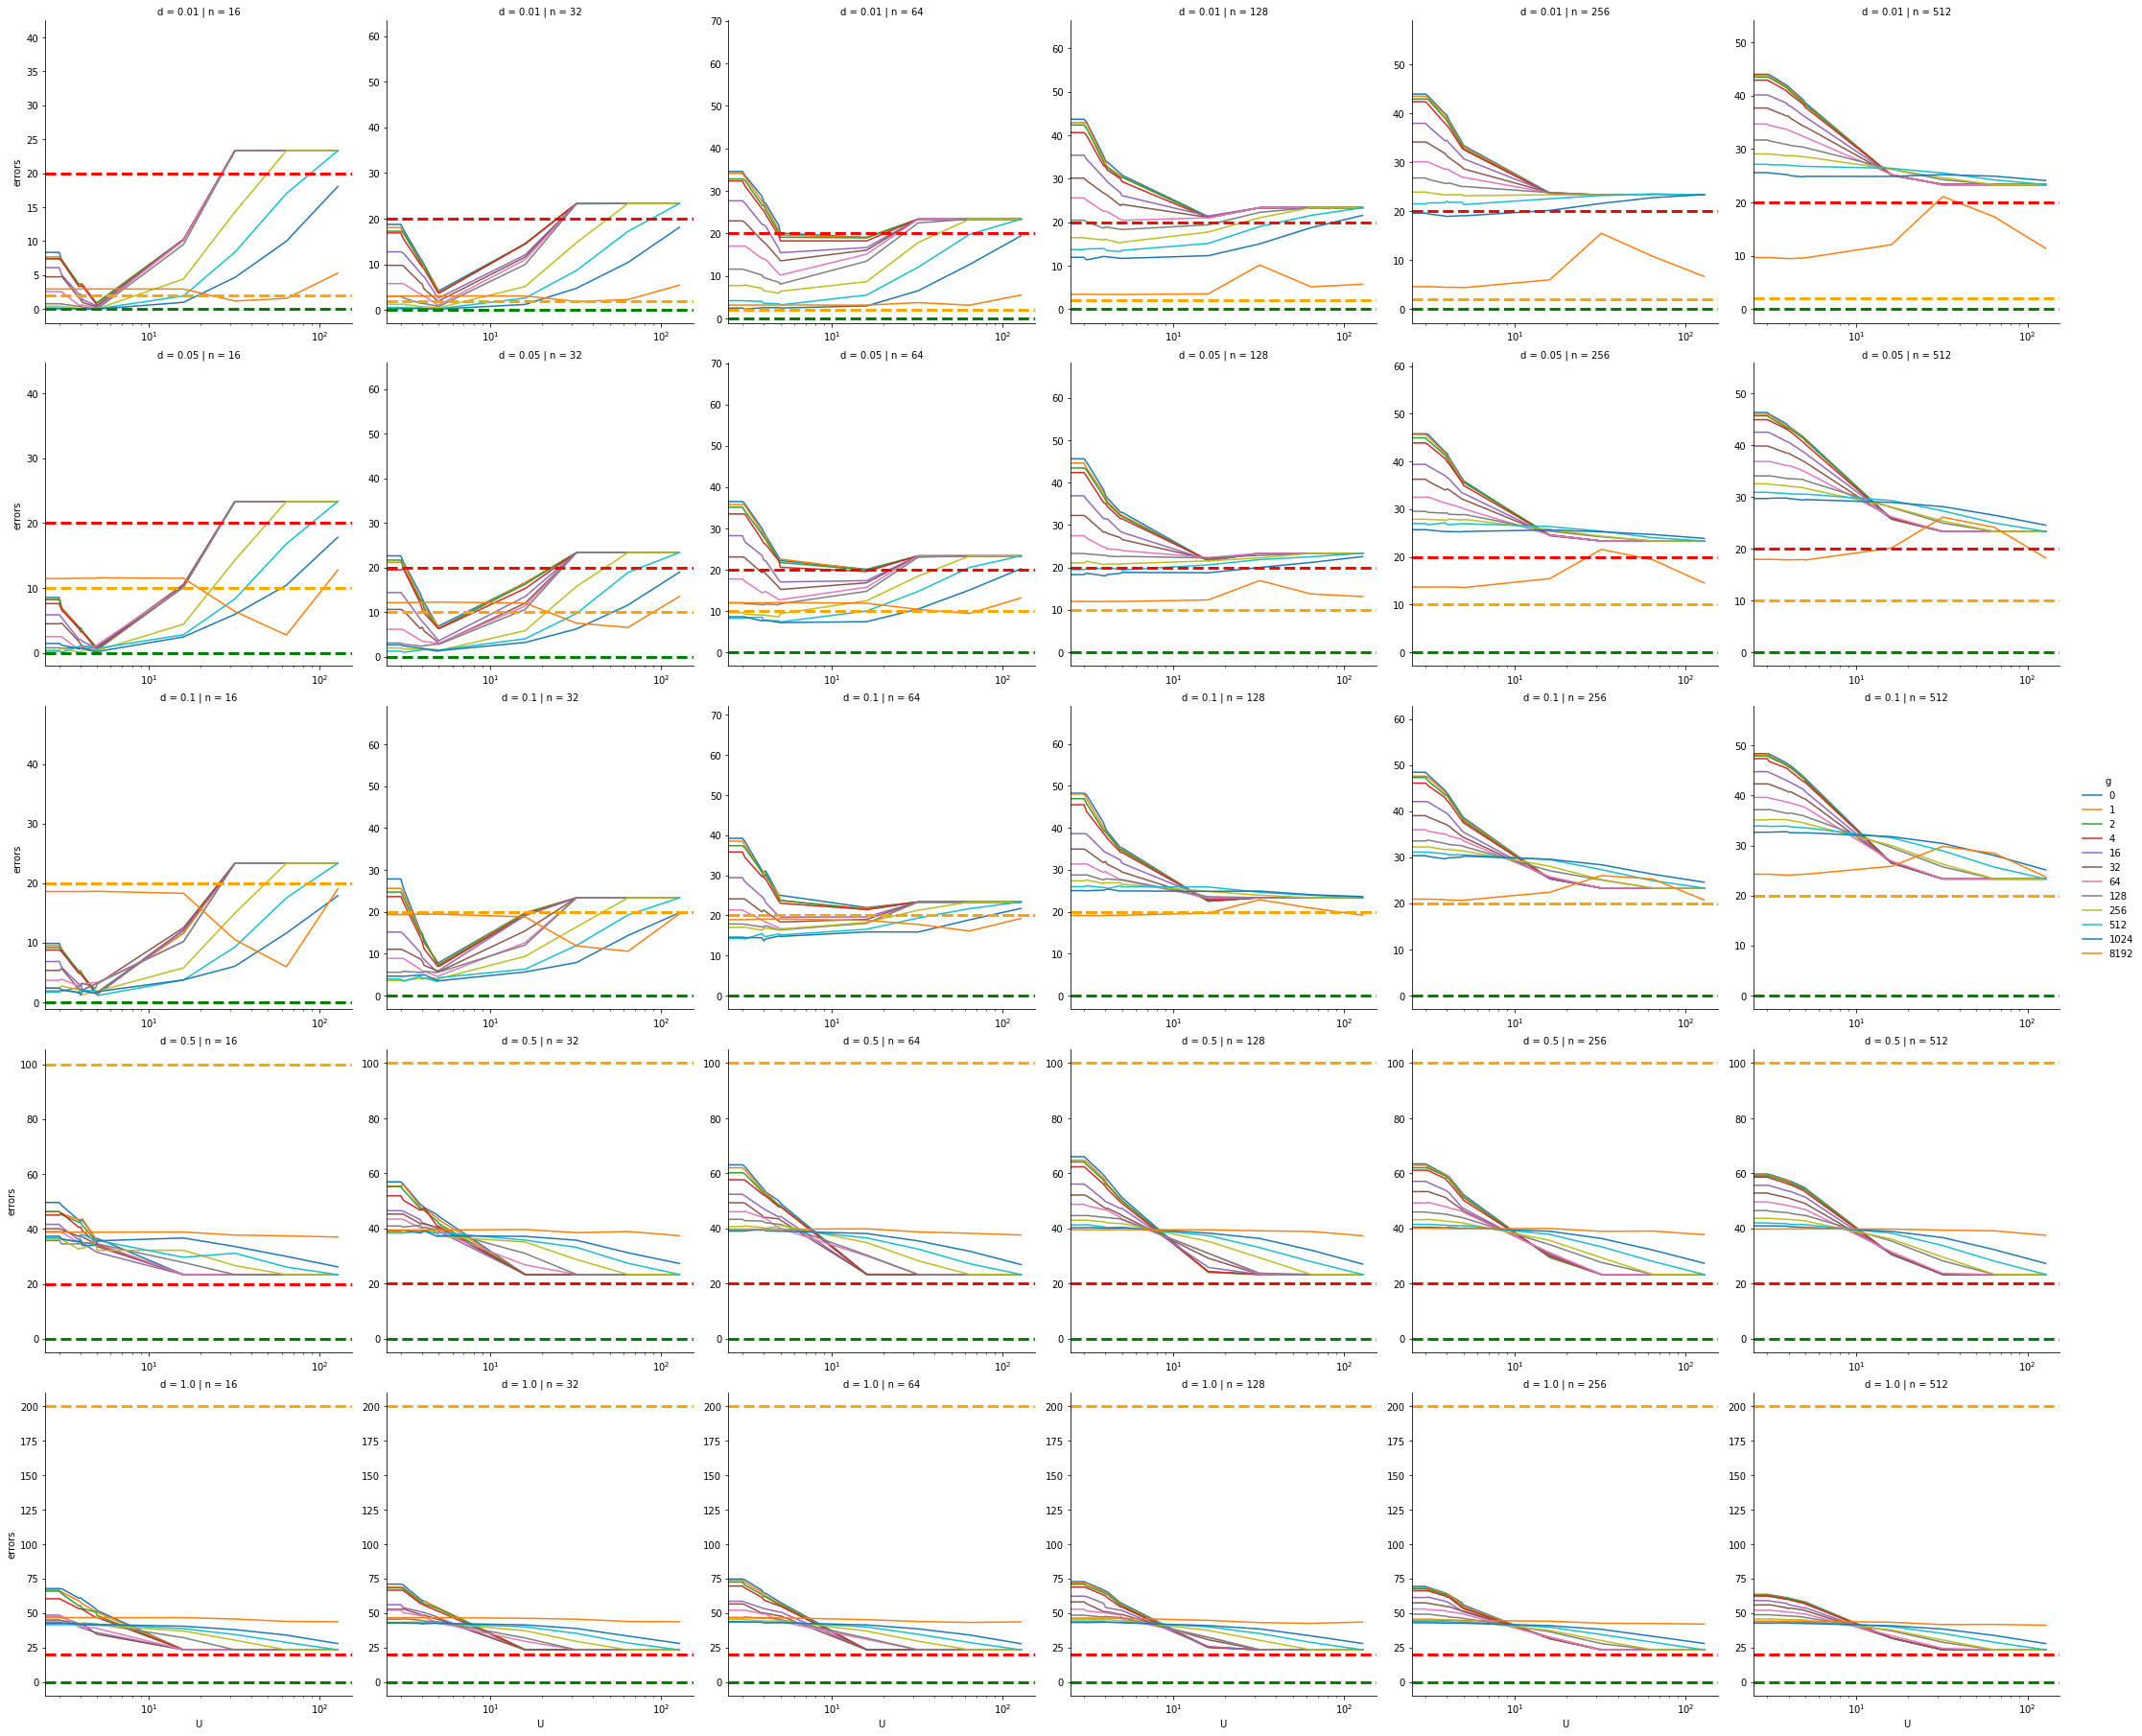

In [7]:
p_fixed = 0.1
N_fixed = 200
d_fixed = 0.5

# df_n = df[(df.type == "noisy") & (df.p == p_fixed) & (df.N == N_fixed) & (df.d == d_fixed)]

df200_ = df200[(df200.type == "noisy")]

g = sns.relplot(x='U', y='errors', hue='g', col='n', row='d', data=df200_, kind='line', facet_kws={'sharey': False, 'sharex': False}, ci=None, palette="tab10")
N = set(df200_.N)
n = set(df200_.n)
d = set(df200_.d)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))

for i in range(len(d)):
    for j in range(len(n)):
        
        g.axes[i,j].set_xscale('log')
        g.axes[i,j].axhline(N_fixed*p_fixed, ls='--', linewidth=3, color='red') #max error if 10% active vals are displaced
        g.axes[i,j].axhline(0, ls='--', linewidth=3, color='green') #0 error
        g.axes[i,j].axhline(d[i]*N_fixed, ls='--', linewidth=3, color='orange') #d

# print all couples u&g with lowest error, print all others not too far

## N=500, p=[0.05, 0.1, 0.2], d=[0.01, 0.05, 0.5, 1]

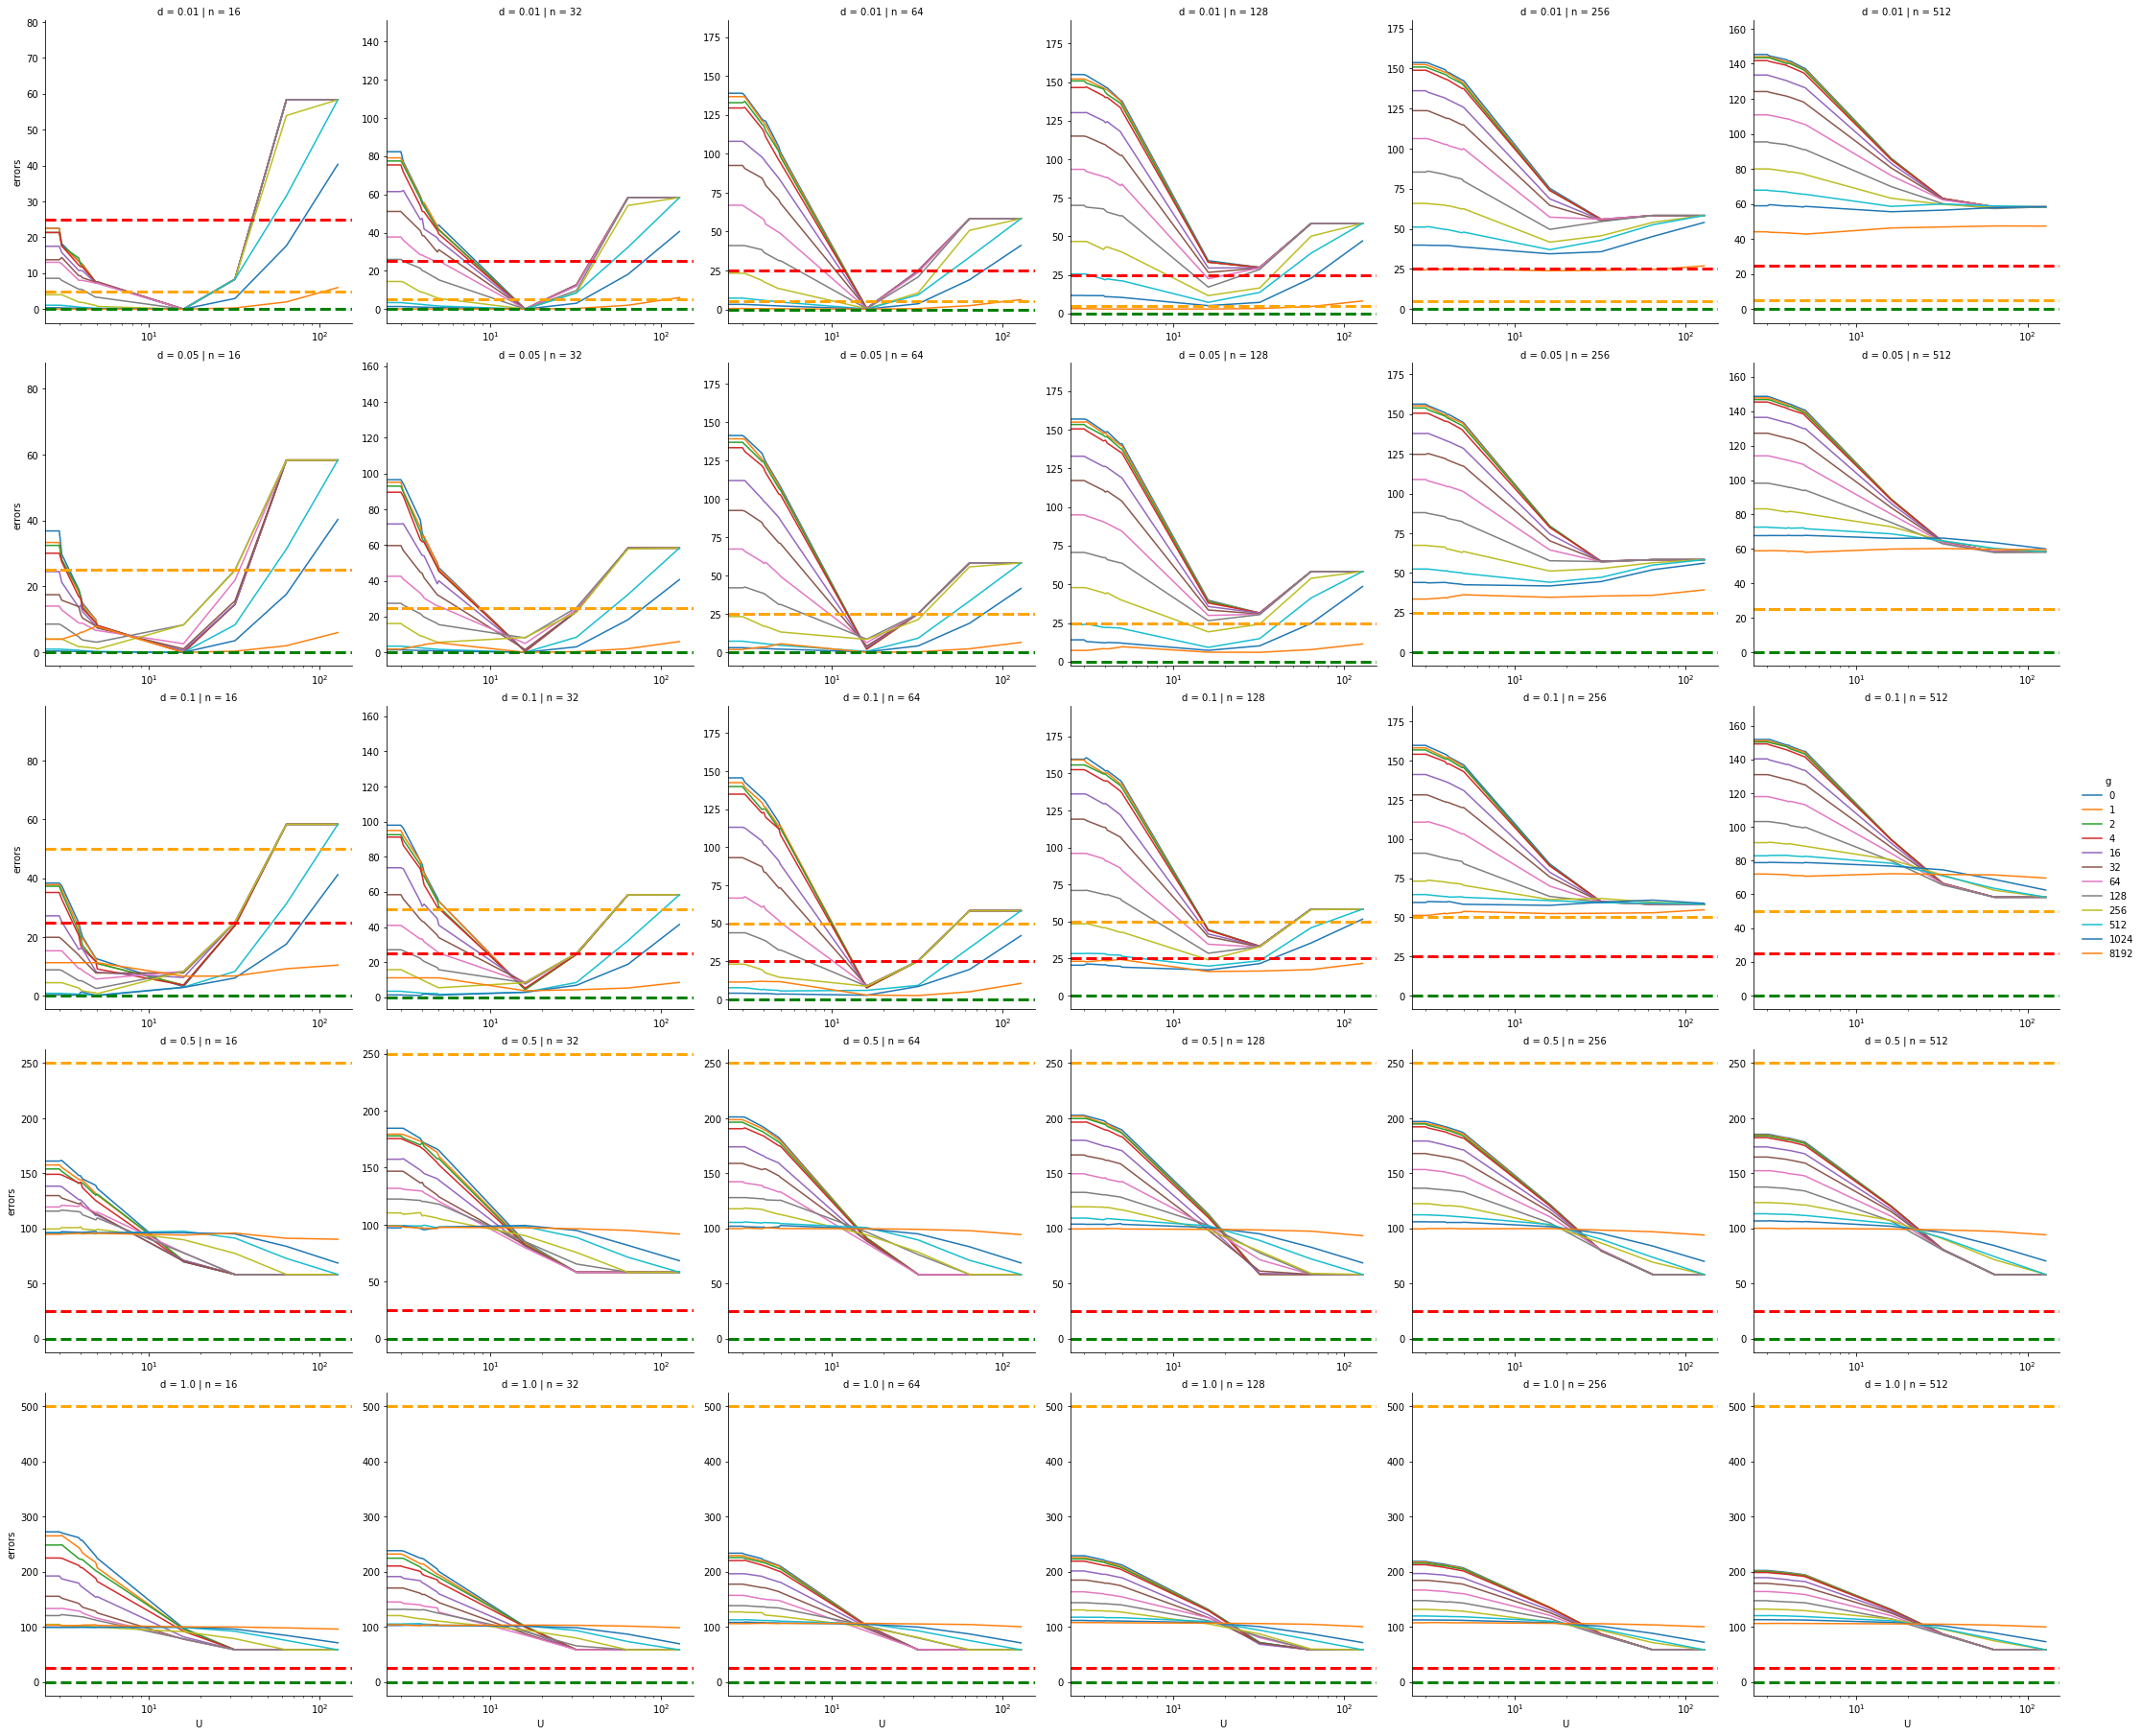

In [8]:
p_fixed = 0.05
N_fixed = 500
d_fixed = 0.5

# df_n = df[(df.type == "noisy") & (df.p == p_fixed) & (df.N == N_fixed) & (df.d == d_fixed)]

df500_ = df500[(df500.type == "noisy")]

g = sns.relplot(x='U', y='errors', hue='g', col='n', row='d', data=df500_, kind='line', facet_kws={'sharey': False, 'sharex': False}, ci=None, palette="tab10")
N = set(df500_.N)
n = set(df500_.n)
d = set(df500_.d)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))

for i in range(len(d)):
    for j in range(len(n)):
        
        g.axes[i,j].set_xscale('log')
        g.axes[i,j].axhline(N_fixed*p_fixed, ls='--', linewidth=3, color='red') #max error if 10% active vals are displaced
        g.axes[i,j].axhline(0, ls='--', linewidth=3, color='green') #0 error
        g.axes[i,j].axhline(d[i]*N_fixed, ls='--', linewidth=3, color='orange') #d

# print all couples u&g with lowest error, print all others not too far

## =============================

## WITH DELTA ERROR

In [6]:
def filter_avg(df_n):
    """
    Averages the errors across parameters.
    """
    df_n = df_n[(df_n.type == "noisy") & ((df_n.p == 0.05) | (df_n.p == 0.1) | (df_n.p == 0.2))]
    df_n = df_n.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
    return(df_n)

In [19]:
def eval_Ug(df_n, N, p, n, d, delta = 1):
    """
    Finds U, g that have the smallest error for a selection of parameters (N, p, n, d) + 
    those U, g pairs that are delta away from min error.
    Totals will be a total number of possible success of (U,g) for a given (N,p) pair
    """
    res = {}
    totals = {}
    U = np.sort(df_n.U.unique())
    g = np.sort(df_n.g.unique())
    
    for i in range(len(N)):
        for l in range(len(p)):
            totals[N[i],p[l]] = 0
            res[N[i],p[l]] = {}
            for j in range(len(n)):
                for k in range(len(d)):
                    df_ijkl = df_n[(df_n.N == N[i]) & (df_n.n == n[j]) & (df_n.d == d[k]) & (df_n.p == p[l])]
                    assert len(df_ijkl) == len(U)*len(g), (df_ijkl, N[i], n[j], d[k], p[l])
                    ind = np.argmin(df_ijkl['errors'])
                    err = df_ijkl.iloc[ind]['errors']
                    df_filt = df_ijkl[(df_ijkl.errors < err + delta)]
                    if err < min(0.9*N[i]*p[l], N[i]*d[k]):
                        totals[N[i],p[l]] += 1 # PUT IN DICT
                        for row in df_filt.itertuples():
                            if (row.U,row.g) not in res[N[i],p[l]]:
                                res[N[i],p[l]][row.U,row.g] = 1
                            else:
                                res[N[i],p[l]][row.U,row.g] = res[N[i],p[l]][row.U,row.g] + 1
#                         for row in df_filt.itertuples():
#                             if (row.U,row.g) not in res:
#                                 res[row.U,row.g] = {}
#                                 res[row.U,row.g]["count"] = 1
#                                 res[row.U,row.g][row.N,row.p] = 1
#                             else:
#                                 res[row.U,row.g]["count"] = res[row.U,row.g]["count"] + 1
#                                 if (row.N,row.p) not in res[row.U,row.g]:
#                                     res[row.U,row.g][row.N,row.p] = 1
#                                 else:    
#                                     res[row.U,row.g][row.N,row.p] = res[row.U,row.g][row.N,row.p] + 1


    return(res,totals)

In [122]:
def count_Ug(res, totals, df_n):
    """
    Counts how many time a pair U, g has succeeded.
    DF also contains total possible success times and
    adds 0 for all pairs that never succeeded.
    """
    fin = {"U":[],"g":[],"totals":[],"N":[],"p":[], "prop":[]}
    U_list = np.sort(df_n.U.unique())
    g_list = np.sort(df_n.g.unique())

#     for Ug in res:
#         for Np in res[Ug]:
#             if Np != "count":
#                 fin["num_all"].append(res[Ug]["count"])
#                 fin["U"].append(Ug[0])
#                 fin["g"].append(Ug[1])
#                 fin["num_pair"].append(res[Ug][Np])
#                 fin["N"].append(Np[0])
#                 fin["p"].append(Np[1])

    for Np in res:
        for Ug in res[Np]:
            fin["totals"].append(totals[Np])
            fin["U"].append(Ug[0])
            fin["g"].append(Ug[1])
            fin["N"].append(Np[0])
            fin["p"].append(Np[1])
            fin["prop"].append(res[Np][Ug]/totals[Np])

#             for U in U_list:
#                 for g in g_list:
#                     if not((U,g) in res[Np]):
#                         fin["U"].append(U)
#                         fin["g"].append(g)
#                         fin["prop"].append(0)
#                         fin["N"].append(np.NaN)
#                         fin["p"].append(np.NaN)
#                         fin["totals"].append(0)


    res_df = pd.DataFrame(fin)
#     res_df["total"] = totals
#     res_df["prop_all"] = res_df.num_all / totals
#     res_df["prop_pair"] = res_df.num_pair / totals

    return(res_df)

In [93]:
def eval_Ug_all(df_n, N, p, n, d, delta = 1):
    """
    Finds U, g that have the smallest error for a selection of parameters (N, p, n, d) + 
    those U, g pairs that are delta away from min error.
    Totals will be a total number of possible success of (U,g) for a given (N,p) pair
    """
    res = {}
    U = np.sort(df_n.U.unique())
    g = np.sort(df_n.g.unique())
    totals=0
    
    for i in range(len(N)):
        for l in range(len(p)):
            for j in range(len(n)):
                for k in range(len(d)):
                    df_ijkl = df_n[(df_n.N == N[i]) & (df_n.n == n[j]) & (df_n.d == d[k]) & (df_n.p == p[l])]
                    assert len(df_ijkl) == len(U)*len(g), (df_ijkl, N[i], n[j], d[k], p[l])
                    ind = np.argmin(df_ijkl['errors'])
                    err = df_ijkl.iloc[ind]['errors']
                    df_filt = df_ijkl[(df_ijkl.errors < err + delta)]
                    if err < min(0.9*N[i]*p[l], N[i]*d[k]):
                        totals += 1
                        for row in df_filt.itertuples():
                            if (row.U,row.g) not in res:
                                res[row.U,row.g] = 1
                            else:
                                res[row.U,row.g] = res[row.U,row.g] + 1
    return(res,totals)

In [94]:
def count_Ug_all(res, totals, df_n):
    """
    Counts how many time a pair U, g has succeeded.
    DF also contains total possible success times and
    adds 0 for all pairs that never succeeded.
    """
    fin = {"U":[],"g":[],"prop":[]}
    U_list = np.sort(df_n.U.unique())
    g_list = np.sort(df_n.g.unique())

    for Ug in res:
        fin["U"].append(Ug[0])
        fin["g"].append(Ug[1])
        fin["prop"].append(res[Ug]/totals)

    res_df = pd.DataFrame(fin)

    return(res_df)

### best U, g for N, p pair

In [24]:
df_100_ = df100[(df100.type == "noisy") & ((df100.p == 0.05) | (df100.p == 0.1) | (df100.p == 0.2))]

df_200_ = df200[(df200.type == "noisy") & ((df200.p == 0.05) | (df200.p == 0.1) | (df200.p == 0.2))]

df_500_ = df500[(df500.type == "noisy") & ((df500.p == 0.05) | (df500.p == 0.1) | (df500.p == 0.2))]

df_all = pd.concat([df_100_,df_200_,df_500_])

In [25]:
N = set(df_all.N)
n = set(df_all.n)
d = set(df_all.d)
p = set(df_all.p)
U = set(df_all.U)
g = set(df_all.g)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))
p = np.sort(list(p))

# df_n = df_n.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()

In [123]:
avg_all = df_all.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()

res_all, totals_all = eval_Ug(avg_all, N, p, n, d)

all_Ug = count_Ug(res_all, totals_all, df_all)

In [124]:
all_Ug[(all_Ug.U==16) & (all_Ug.g==1024)]

U     g  totals    N     p      prop
291  16.0  1024       9  200  0.10  0.666667
332  16.0  1024       6  200  0.20  1.000000
407  16.0  1024      14  500  0.05  0.642857
439  16.0  1024      14  500  0.10  0.857143
490  16.0  1024      11  500  0.20  0.818182

In [125]:
all_Ug[(all_Ug.U==4.1) & (all_Ug.g==512)]

U    g  totals    N     p      prop
15   4.1  512       5  100  0.05  1.000000
67   4.1  512       7  100  0.10  0.142857
144  4.1  512       5  100  0.20  0.400000
221  4.1  512      12  200  0.05  0.333333
267  4.1  512       9  200  0.10  0.888889
310  4.1  512       6  200  0.20  1.000000
370  4.1  512      14  500  0.05  0.571429
420  4.1  512      14  500  0.10  0.214286
467  4.1  512      11  500  0.20  0.272727

In [100]:
res, totals = eval_Ug_all(avg_all, N, p, n, d)

Ug = count_Ug_all(res, totals, df_all)

In [111]:
max_prop_df = Ug.groupby(["U","g"],as_index=False).mean().sort_values("prop", axis=0)

In [ ]:
pair1 = (16.0,1024)
pair2 = (4.1, 512)


In [114]:
max_prop_df

U     g      prop
113   64.0  8192  0.012048
114  128.0  8192  0.024096
0      0.0   128  0.036145
8      3.0     4  0.060241
17     3.1     0  0.060241
..     ...   ...       ...
74     4.9   512  0.457831
50     4.0   512  0.469880
86     5.0   512  0.469880
62     4.1   512  0.481928
99    16.0  1024  0.506024

[115 rows x 3 columns]

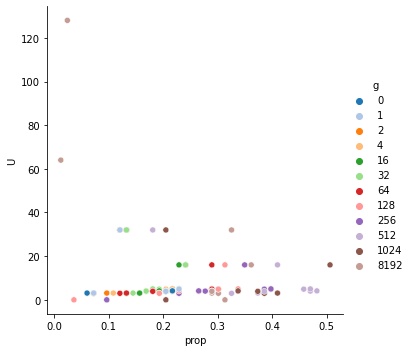

In [113]:
g = sns.relplot(x="prop", y="U", hue="g", data=max_prop_df, kind="scatter", legend="full", palette="tab20", facet_kws={'sharey': False, 'sharex': False}, ci=False)


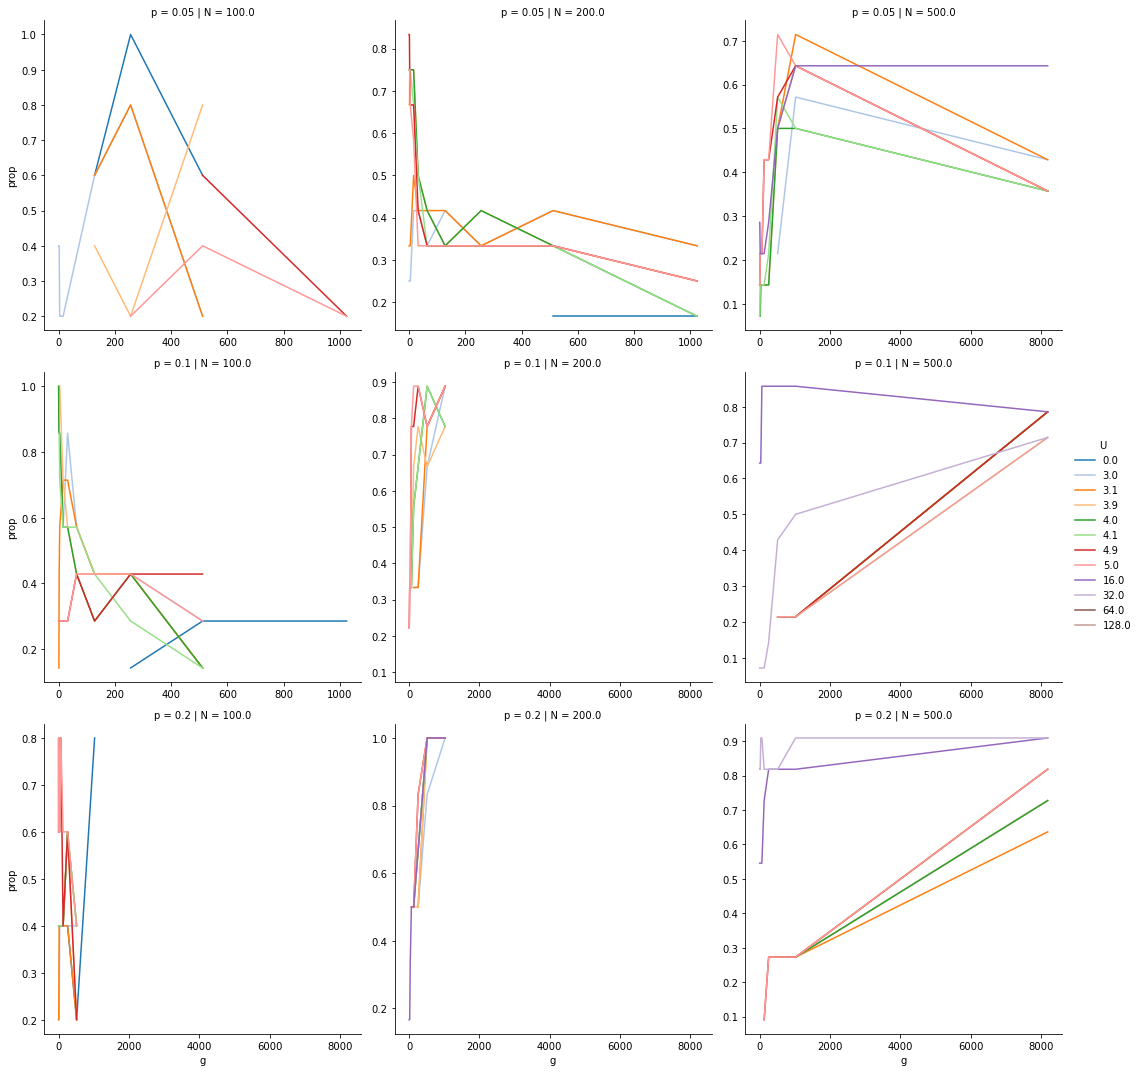

In [43]:
g = sns.relplot(x="g", y="prop", col="N", row = "p", hue = "U", data=all_Ug, kind="line", legend="full", palette="tab20", facet_kws={'sharey': False, 'sharex': False}, ci=False)


In [78]:
UgNp_avg = all_Ug.groupby(by=['N','p'])
param = 0.90
list_all = []

for group,group_df in UgNp_avg:
    max_i = np.max(group_df.prop)
    df_max = group_df[group_df.prop > param*max_i]
#     print(df_max)
    list_all.append(df_max)

df_fin = pd.concat(list_all)

In [67]:
df_fin

U     g  totals      N     p      prop
121     0.0   256       5  100.0  0.05  1.000000
1694    4.0   512       5  100.0  0.05  1.000000
1815    4.1   512       5  100.0  0.05  1.000000
3982    3.9     0       7  100.0  0.10  1.000000
4059    3.9     1       7  100.0  0.10  1.000000
4136    3.9     2       7  100.0  0.10  1.000000
4213    3.9     4       7  100.0  0.10  1.000000
4752    4.0     0       7  100.0  0.10  1.000000
8282    0.0  1024       5  100.0  0.20  0.800000
12045   4.9     2       5  100.0  0.20  0.800000
12329   4.9    64       5  100.0  0.20  0.800000
12684   5.0     1       5  100.0  0.20  0.800000
12755   5.0     2       5  100.0  0.20  0.800000
12826   5.0     4       5  100.0  0.20  0.800000
13039   5.0    64       5  100.0  0.20  0.800000
17156   4.9     0      12  200.0  0.05  0.833333
17222   4.9     1      12  200.0  0.05  0.833333
18996   3.0  1024       9  200.0  0.10  0.888889
19384   3.1  1024       9  200.0  0.10  0.888889
20257   4.0   512       9  200.0  0.10  0.888889
20742   4.1   512       9  200.0  0.10  0.888889
21712   4.9   256       9  200.0  0.10  0.888889
21906   4.9  1024       9  200.0  0.10  0.888889
22682   5.0   128       9  200.0  0.10  0.888889
22779   5.0   256       9  200.0  0.10  0.888889
22973   5.0  1024       9  200.0  0.10  0.888889
23576   3.0  1024       6  200.0  0.20  1.000000
23784   3.1   512       6  200.0  0.20  1.000000
23888   3.1  1024       6  200.0  0.20  1.000000
24200   3.9   512       6  200.0  0.20  1.000000
24304   3.9  1024       6  200.0  0.20  1.000000
24616   4.0   512       6  200.0  0.20  1.000000
24720   4.0  1024       6  200.0  0.20  1.000000
25032   4.1   512       6  200.0  0.20  1.000000
25136   4.1  1024       6  200.0  0.20  1.000000
25552   4.9   512       6  200.0  0.20  1.000000
25656   4.9  1024       6  200.0  0.20  1.000000
26072   5.0   512       6  200.0  0.20  1.000000
26176   5.0  1024       6  200.0  0.20  1.000000
27216  16.0   512       6  200.0  0.20  1.000000
27320  16.0  1024       6  200.0  0.20  1.000000
27873   3.1  1024      14  500.0  0.05  0.714286
31668   5.0   512      14  500.0  0.05  0.714286
35297  16.0    64      14  500.0  0.10  0.857143
35398  16.0   128      14  500.0  0.10  0.857143
35499  16.0   256      14  500.0  0.10  0.857143
35600  16.0   512      14  500.0  0.10  0.857143
35701  16.0  1024      14  500.0  0.10  0.857143
40731  16.0  8192      11  500.0  0.20  0.909091
41301  32.0    32      11  500.0  0.20  0.909091
41396  32.0    64      11  500.0  0.20  0.909091
41776  32.0  1024      11  500.0  0.20  0.909091
41871  32.0  8192      11  500.0  0.20  0.909091

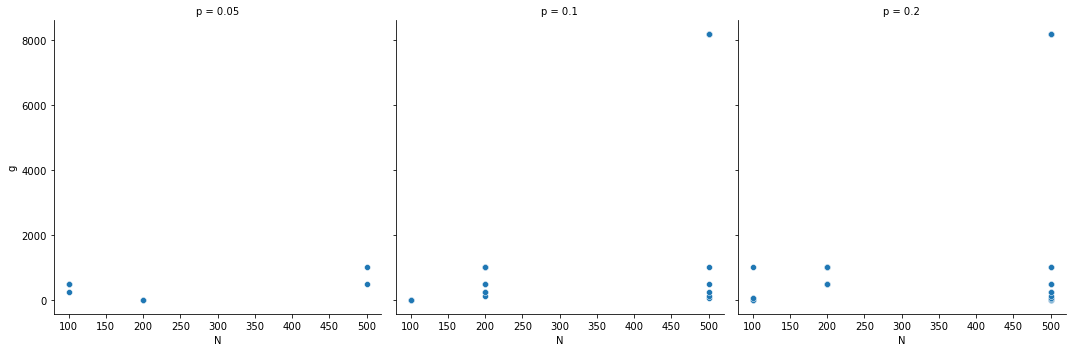

In [62]:
g = sns.relplot(x="N", y="g", col="p", data=df_fin, kind="scatter", legend="full", palette="tab20", facet_kws={'sharey': True, 'sharex': True}, ci=True)


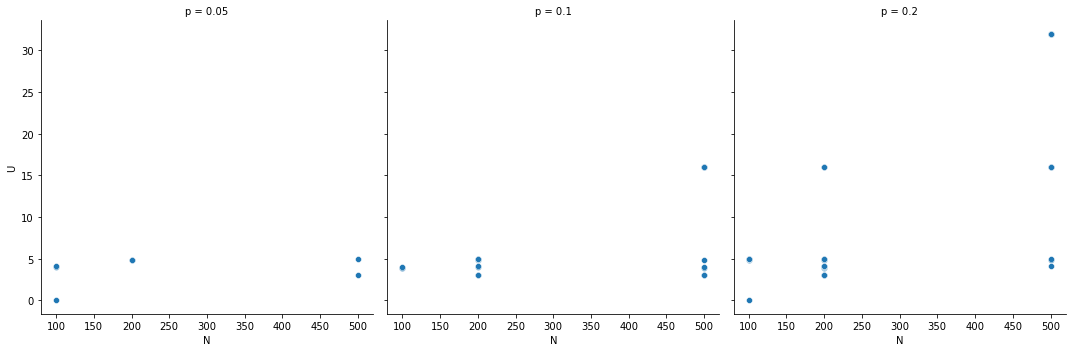

In [61]:
g = sns.relplot(x="N", y="U", col="p", data=df_fin, kind="scatter", legend="full", palette="tab20", facet_kws={'sharey': True, 'sharex': True}, ci=True)


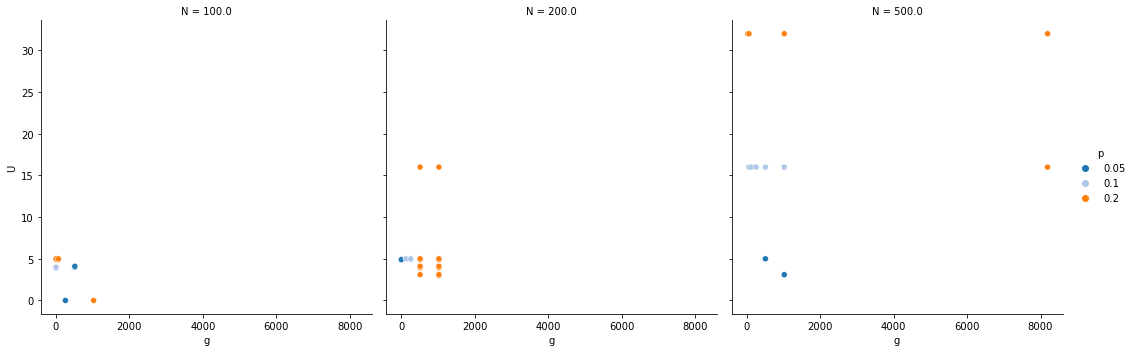

In [72]:
g = sns.relplot(x="g", y="U", hue="p", col="N", data=df_fin, kind="scatter", legend="full", palette="tab20", facet_kws={'sharey': True, 'sharex': True}, ci=True)
# col="N", row="p",

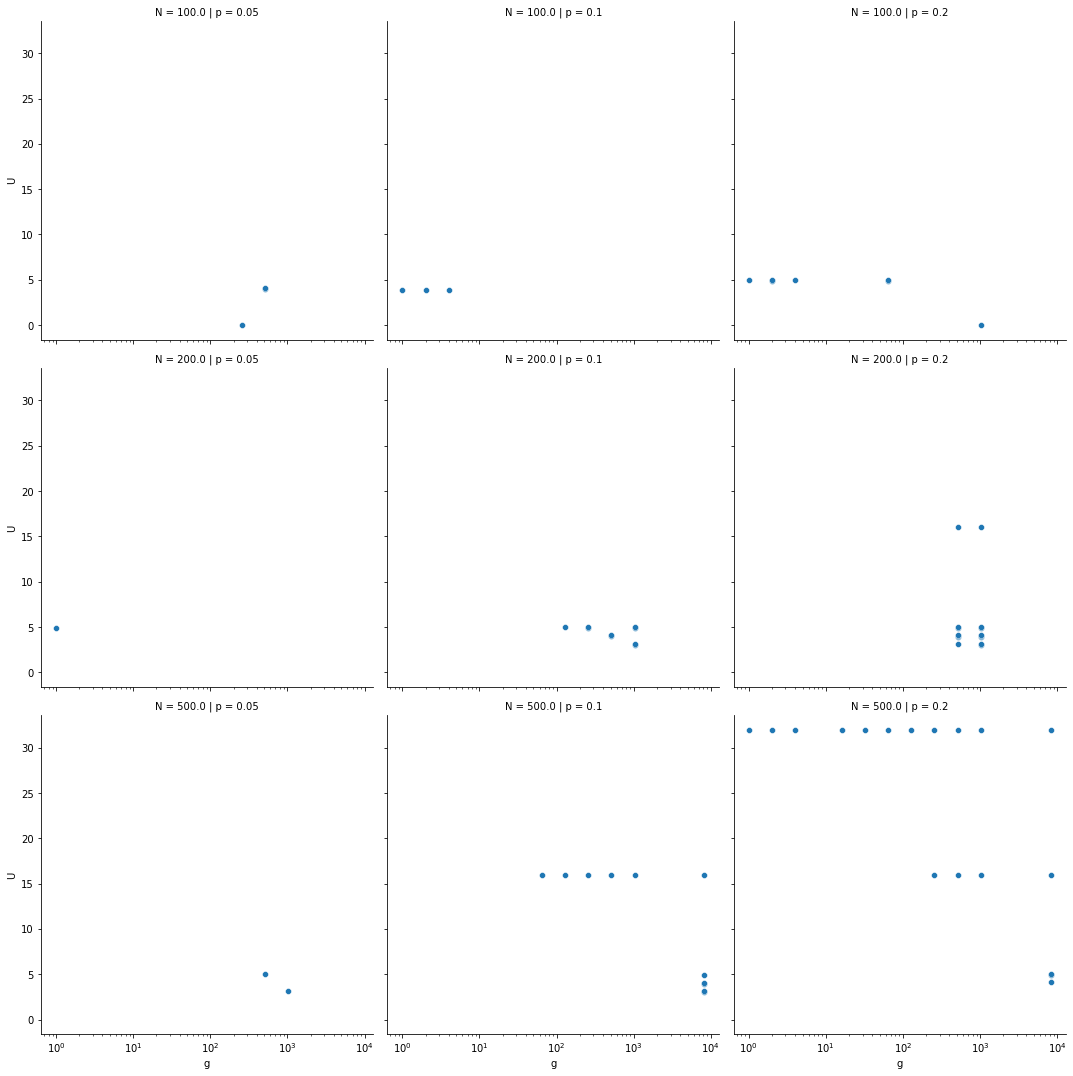

In [80]:
g = sns.relplot(x="g", y="U", row="N", col="p", data=df_fin, kind="scatter", legend="full", palette="tab20", facet_kws={'sharey': True, 'sharex': True}, ci=False)

for i in range(3):
    for j in range(3):
        g.axes[i,j].set_xscale('log')

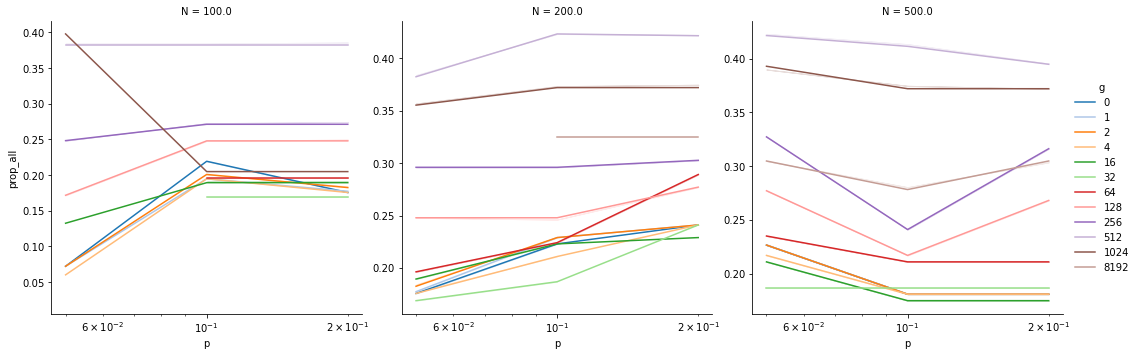

In [79]:
g = sns.relplot(x='p', y='prop_all', col="N", hue = "g", data=all_Ug, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False, 'sharex': False}, ci=False)
g.axes[0,0].set_xscale('log')
g.axes[0,1].set_xscale('log')
g.axes[0,2].set_xscale('log')

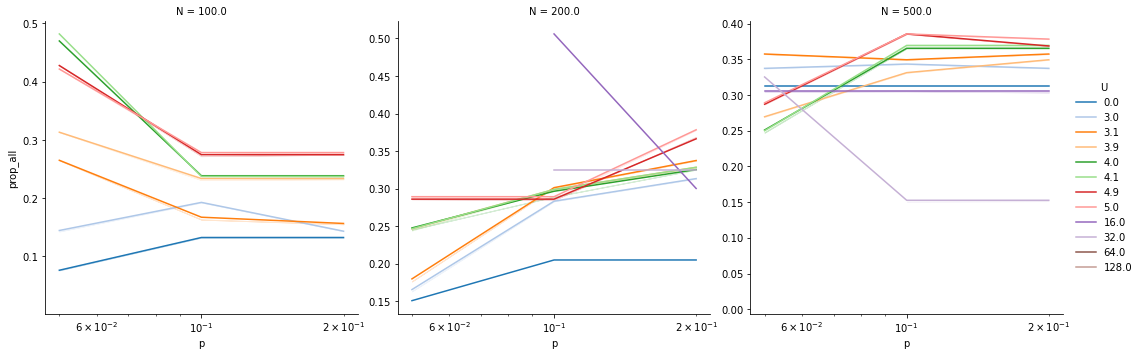

In [83]:
g = sns.relplot(x='p', y='prop_all', col="N", hue = "U", data=all_Ug, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False, 'sharex': False}, ci=False)
g.axes[0,0].set_xscale('log')
g.axes[0,1].set_xscale('log')
g.axes[0,2].set_xscale('log')

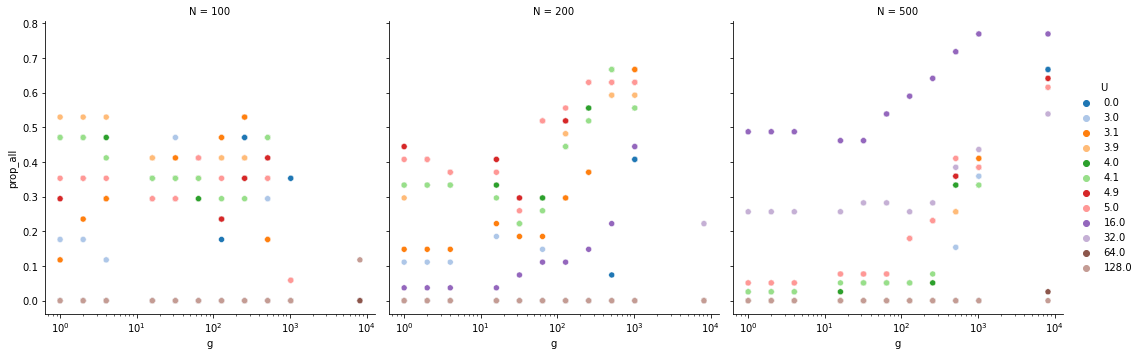

In [128]:
g = sns.relplot(x='g', y='prop_all', hue='U', data=df_N, col="N", kind='scatter', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g.axes[0,0].set_xscale('log')

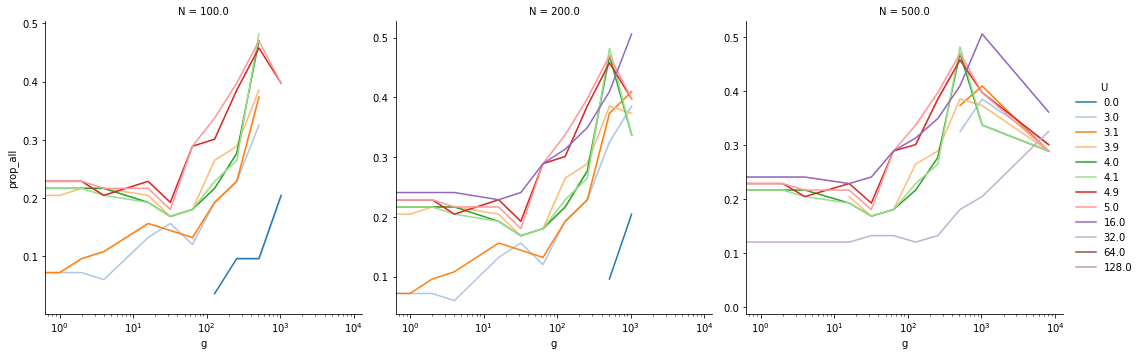

In [78]:
g = sns.relplot(x='g', y='prop_all', col="N", hue = "U", data=all_Ug, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False, 'sharex': False}, ci=False)
g.axes[0,0].set_xscale('log')
g.axes[0,1].set_xscale('log')
g.axes[0,2].set_xscale('log')

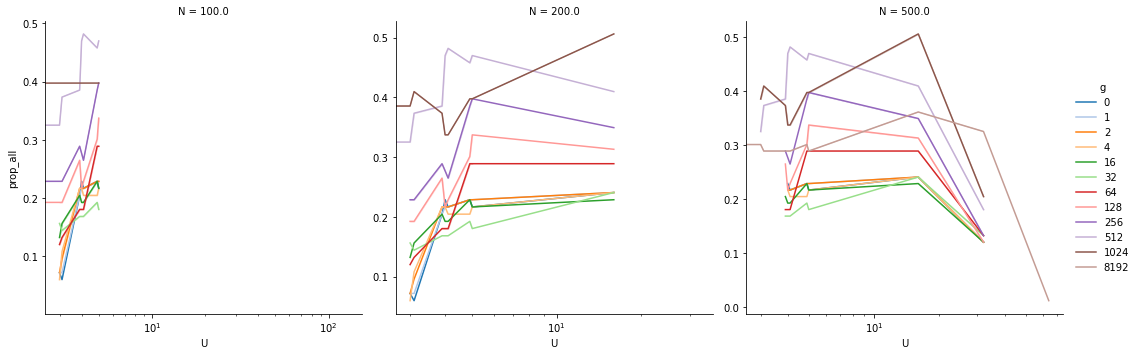

In [80]:
g = sns.relplot(x='U', y='prop_all', col="N", hue = "g", data=all_Ug, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False, 'sharex': False}, ci=False)
g.axes[0,0].set_xscale('log')
g.axes[0,1].set_xscale('log')
g.axes[0,2].set_xscale('log')

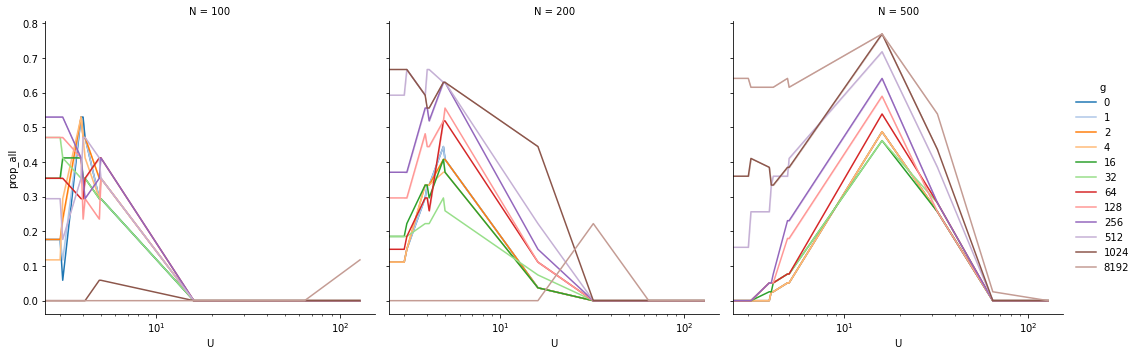

In [71]:
g = sns.relplot(x='U', y='prop_all', hue='g', data=df_N, col="N", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g.axes[0,0].set_xscale('log')

In [26]:
list_all = []
for row in avg_all.itertuples():
    filtUg = avg_all[(avg_all.g==row.g) & (avg_all.U==row.U)]
    list_all.append(filtUg)

Ug_err = pd.concat(list_all).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()

Ug_err

N     d     p    n      errors
0    100  0.01  0.05   16    3.781684
1    100  0.01  0.05   32    4.110026
2    100  0.01  0.05   64    4.462999
3    100  0.01  0.05  128    4.668566
4    100  0.01  0.05  256    5.021566
..   ...   ...   ...  ...         ...
265  500  1.00  0.20   32  201.003255
266  500  1.00  0.20   64  205.439670
267  500  1.00  0.20  128  205.477539
268  500  1.00  0.20  256  201.710069
269  500  1.00  0.20  512  193.749607

[270 rows x 5 columns]

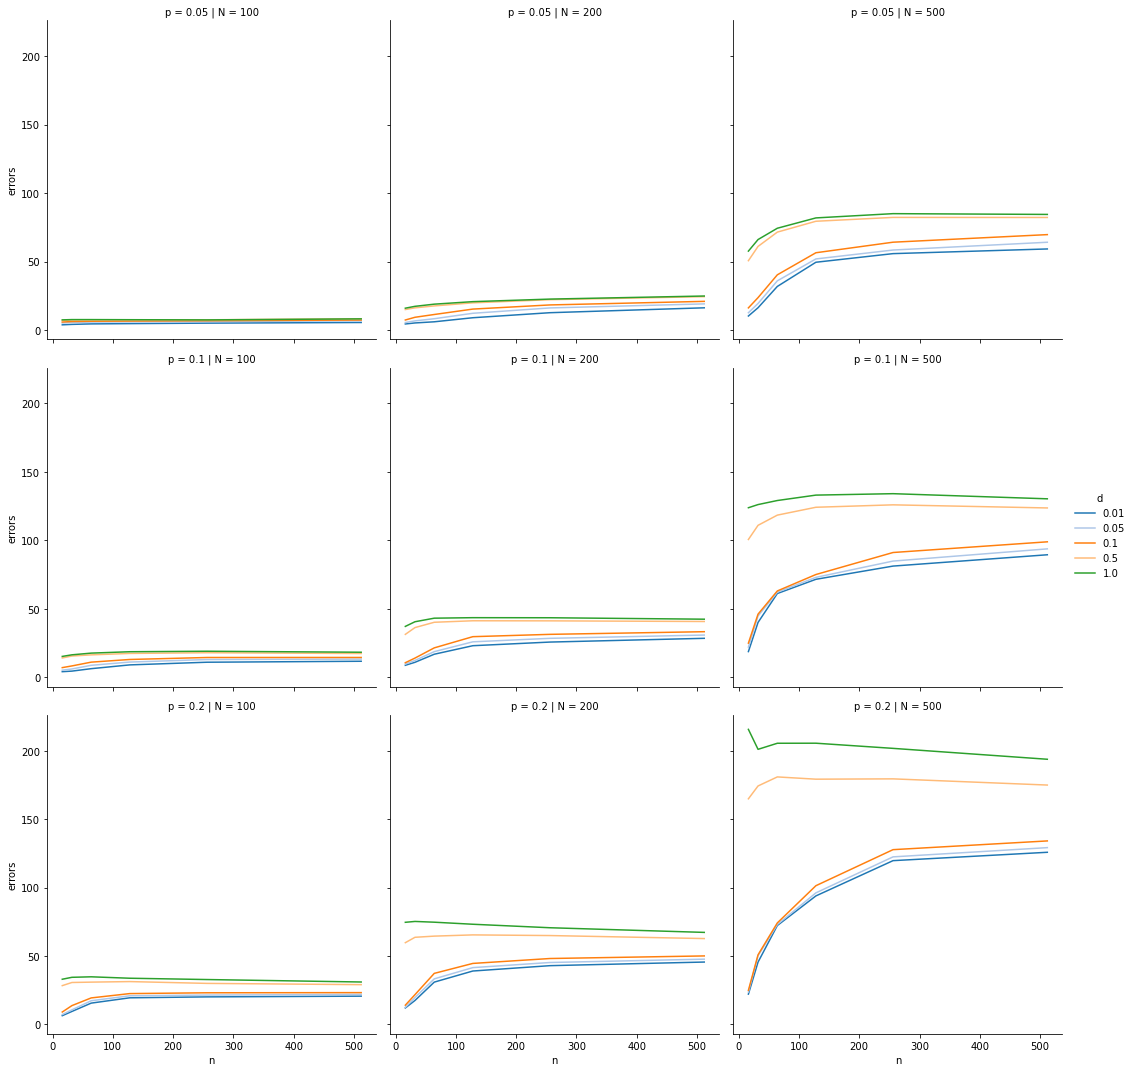

In [168]:
g = sns.relplot(x='n', y='errors', col='N', row="p", hue = "d", data=Ug_err, kind='line', legend="full", palette="tab20", facet_kws={'sharey': True})


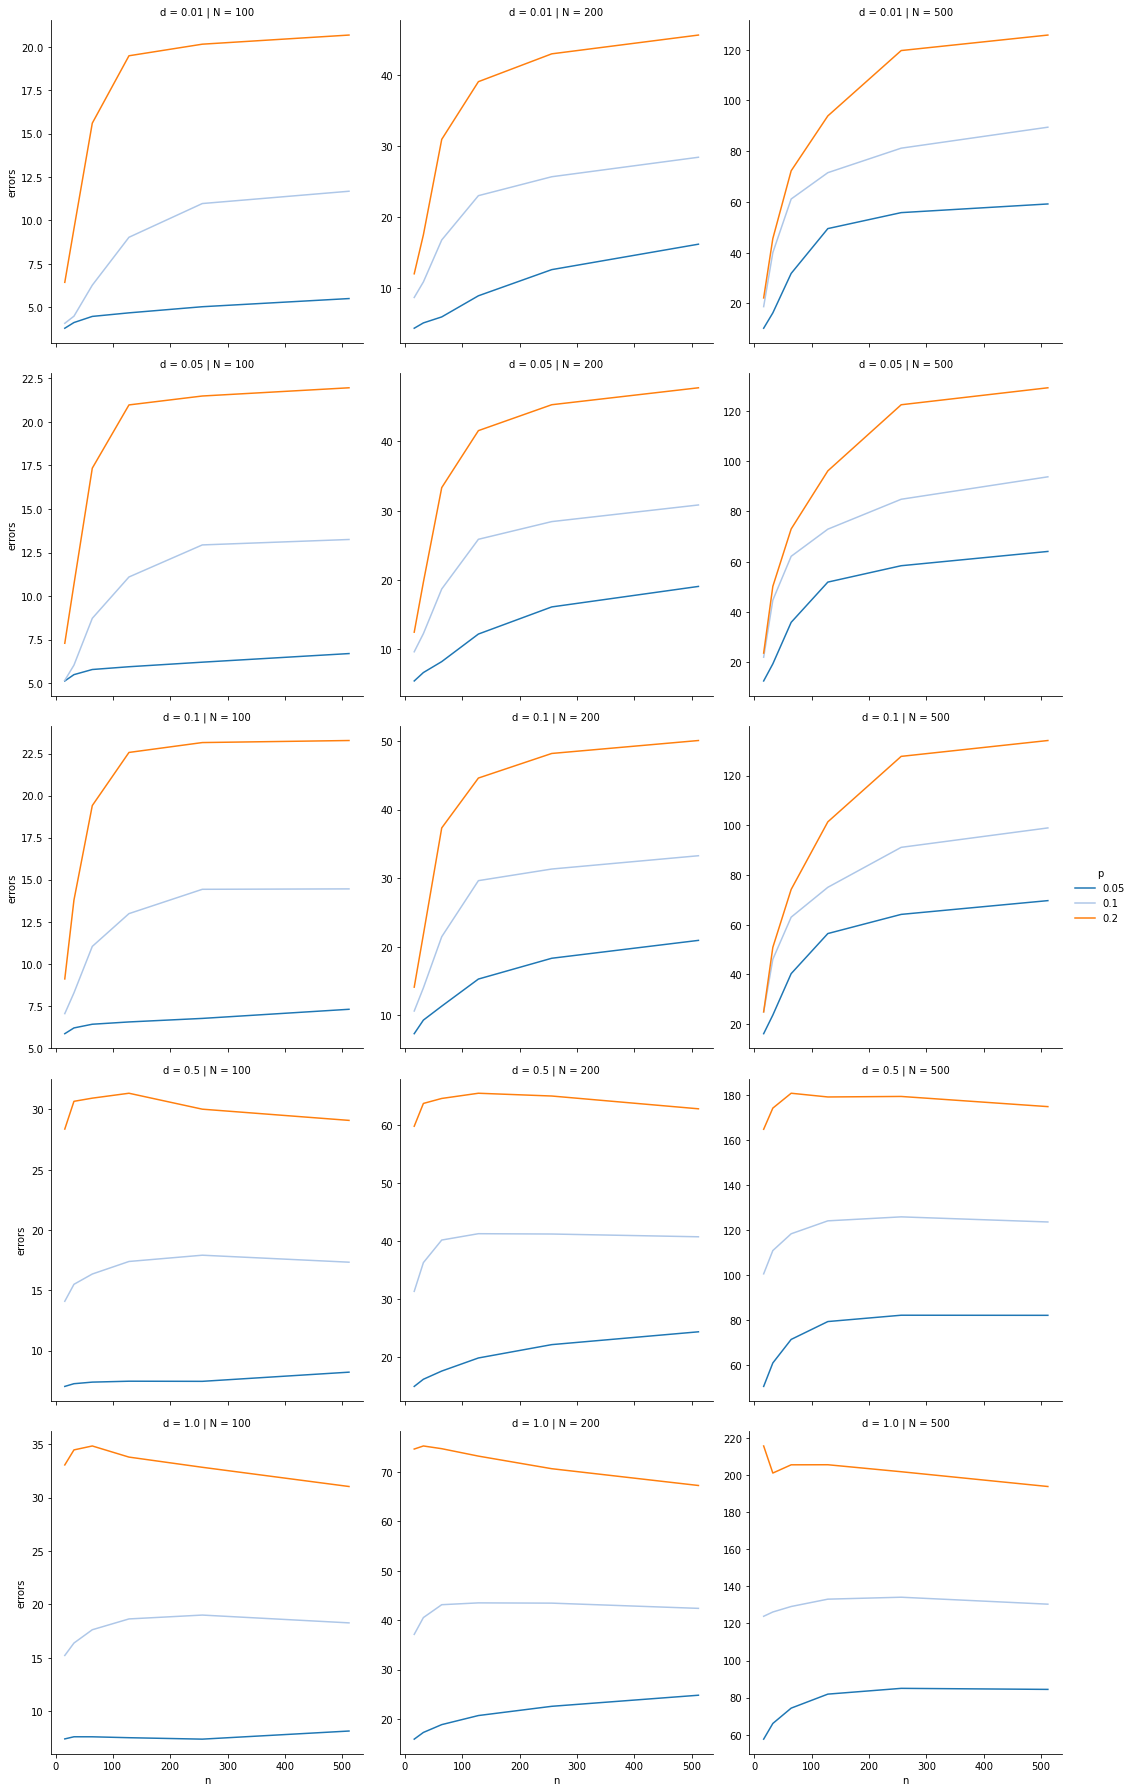

In [169]:
g = sns.relplot(x='n', y='errors', col='N', row='d', hue='p', data=Ug_err, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False}) #, ci=None)


In [165]:
ind = np.argmax(all_Ug.prop_all)
top_choice = all_Ug.iloc[ind].prop_all
df_topUg = all_Ug[all_Ug.prop_all > 0.9*top_choice]

dfN1 = df_topUg.N.copy().reset_index()
dfN2 = df_topUg.N.copy().reset_index()

dfN1["param"] = np.array(df_topUg.U)
dfN1["param_name"] = "U"

dfN2["param"] = np.array(df_topUg.g)
dfN2["param_name"] = "g"

top = pd.concat([dfN1,dfN2]).reset_index()

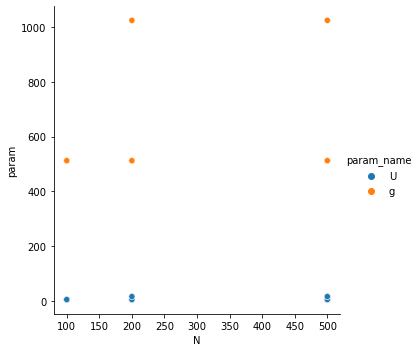

In [164]:
g = sns.relplot(x='N', y='param', hue = "param_name", data=top, kind='scatter', legend="full", facet_kws={'sharey': False, 'sharex': False}, ci=False)


### Results per p or N separately

In [27]:
N100=filter_avg(df100)
N200=filter_avg(df200)
N500=filter_avg(df500)

In [28]:
p05 = filter_avg(df_all[df_all.p==0.05])
p1 = filter_avg(df_all[df_all.p==0.1])
p2 = filter_avg(df_all[df_all.p==0.2])

In [29]:
resN100, totalsN100 = eval_Ug(N100, [100], p,n,d)
resN200, totalsN200 = eval_Ug(N200, [200], p,n,d)
resN500, totalsN500 = eval_Ug(N500, [500], p,n,d)

In [30]:
resp05, totalsp05 = eval_Ug(p05, [100,200,500], [0.05],n,d)
resp1, totalsp1 = eval_Ug(p1, [100,200,500], [0.1],n,d)
resp2, totalsp2 = eval_Ug(p2, [100,200,500], [0.2],n,d)

In [31]:
N100_Ug = count_Ug(resN100, totalsN100, N100)
N200_Ug = count_Ug(resN200, totalsN200, N200)
N500_Ug = count_Ug(resN500, totalsN500, N500)

In [32]:
p05_Ug = count_Ug(resp05, totalsp05, p05)
p1_Ug = count_Ug(resp1, totalsp1, p1)
p2_Ug = count_Ug(resp2, totalsp2, p2)

In [33]:
N100_Ug["N"] = 100
N200_Ug["N"] = 200
N500_Ug["N"] = 500

p05_Ug["p"] = 0.05
p1_Ug["p"] = 0.1
p2_Ug["p"] = 0.2

df_N = pd.concat([N100_Ug,N200_Ug,N500_Ug])
df_p = pd.concat([p05_Ug, p1_Ug, p2_Ug])

In [34]:
# Find top U, g pair choice for each N
# Also keep the U, g pairs that have at least 95% of the top success rate

ind = np.argmax(N100_Ug.prop_all)
top_choice = N100_Ug.iloc[ind].prop_all
df_filt100 = N100_Ug[N100_Ug.prop_all > 0.95*top_choice]

ind = np.argmax(N200_Ug.prop_all)
top_choice = N200_Ug.iloc[ind].prop_all
df_filt200 = N200_Ug[N200_Ug.prop_all > 0.95*top_choice]

ind = np.argmax(N500_Ug.prop_all)
top_choice = N500_Ug.iloc[ind].prop_all
df_filt500 = N500_Ug[N500_Ug.prop_all > 0.95*top_choice]

df_topUg = pd.concat([df_filt100, df_filt200, df_filt500])

dfN1 = df_topUg.N.copy().reset_index()
dfN2 = df_topUg.N.copy().reset_index()

dfN1["param"] = np.array(df_topUg.U)
dfN1["param_name"] = "U"

dfN2["param"] = np.array(df_topUg.g)
dfN2["param_name"] = "g"

top = pd.concat([dfN1,dfN2])

In [35]:
df100avg = df_100_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
df200avg = df_200_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
df500avg = df_500_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()

In [36]:
list100 = []
for row in df_filt100.itertuples():
    filtUg = df100avg[(df100avg.g==row.g) & (df100avg.U==row.U)]
    list100.append(filtUg)

Ug_err100 = pd.concat(list100).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()

list200 = []
for row in df_filt200.itertuples():
    filtUg = df200avg[(df200avg.g==row.g) & (df200avg.U==row.U)]
    list200.append(filtUg)

Ug_err200 = pd.concat(list200).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()


list500 = []
for row in df_filt500.itertuples():
    filtUg = df500avg[(df500avg.g==row.g) & (df500avg.U==row.U)]
    list500.append(filtUg)

Ug_err500 = pd.concat(list500).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()

Ug_err = pd.concat([Ug_err100, Ug_err200, Ug_err500])

### Num of errors by p, N, n, d for the best U, g

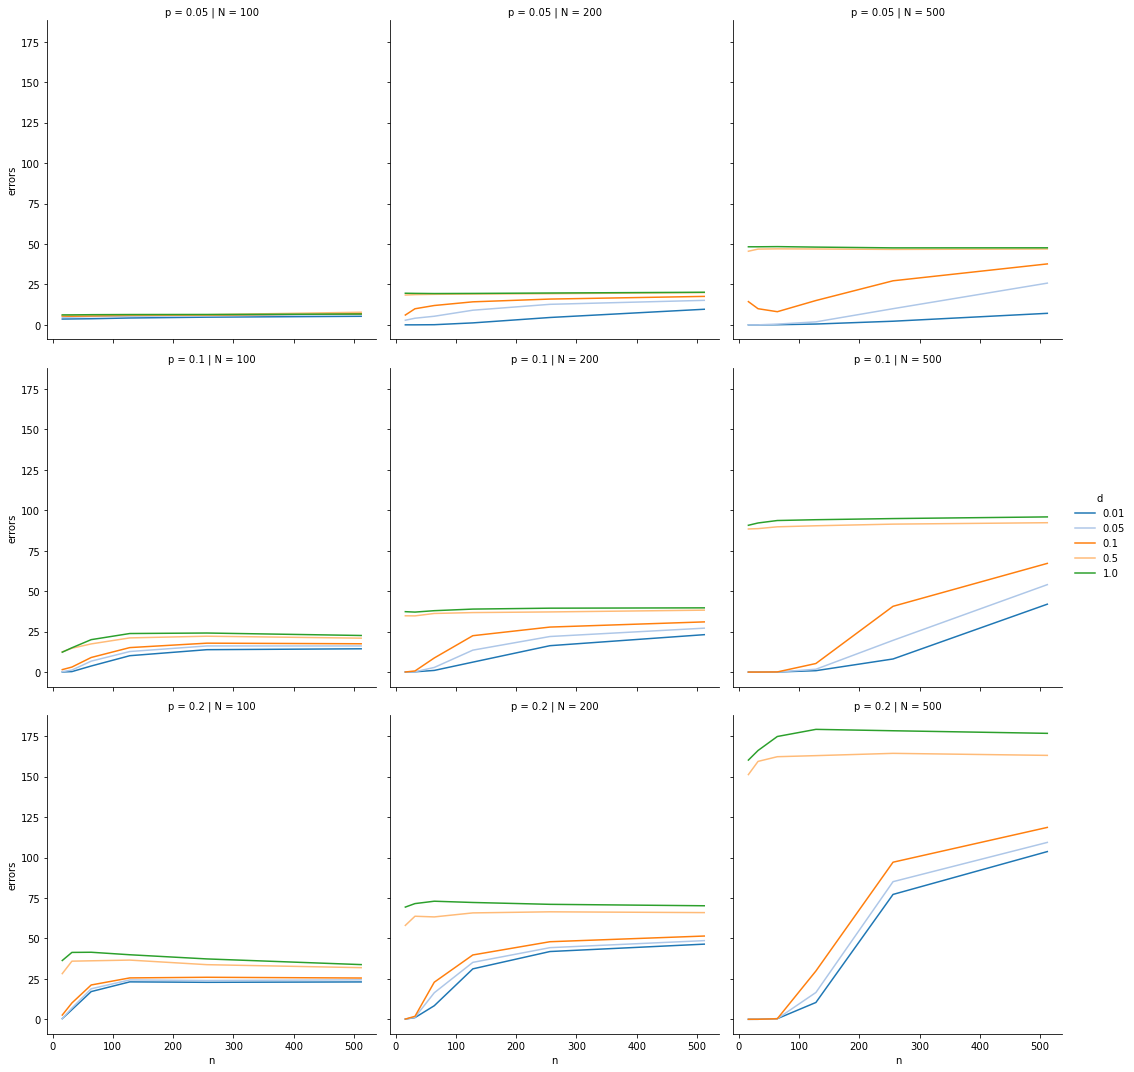

In [23]:
g = sns.relplot(x='n', y='errors', col='N', row="p", hue = "d", data=Ug_err, kind='line', legend="full", palette="tab20", facet_kws={'sharey': True})


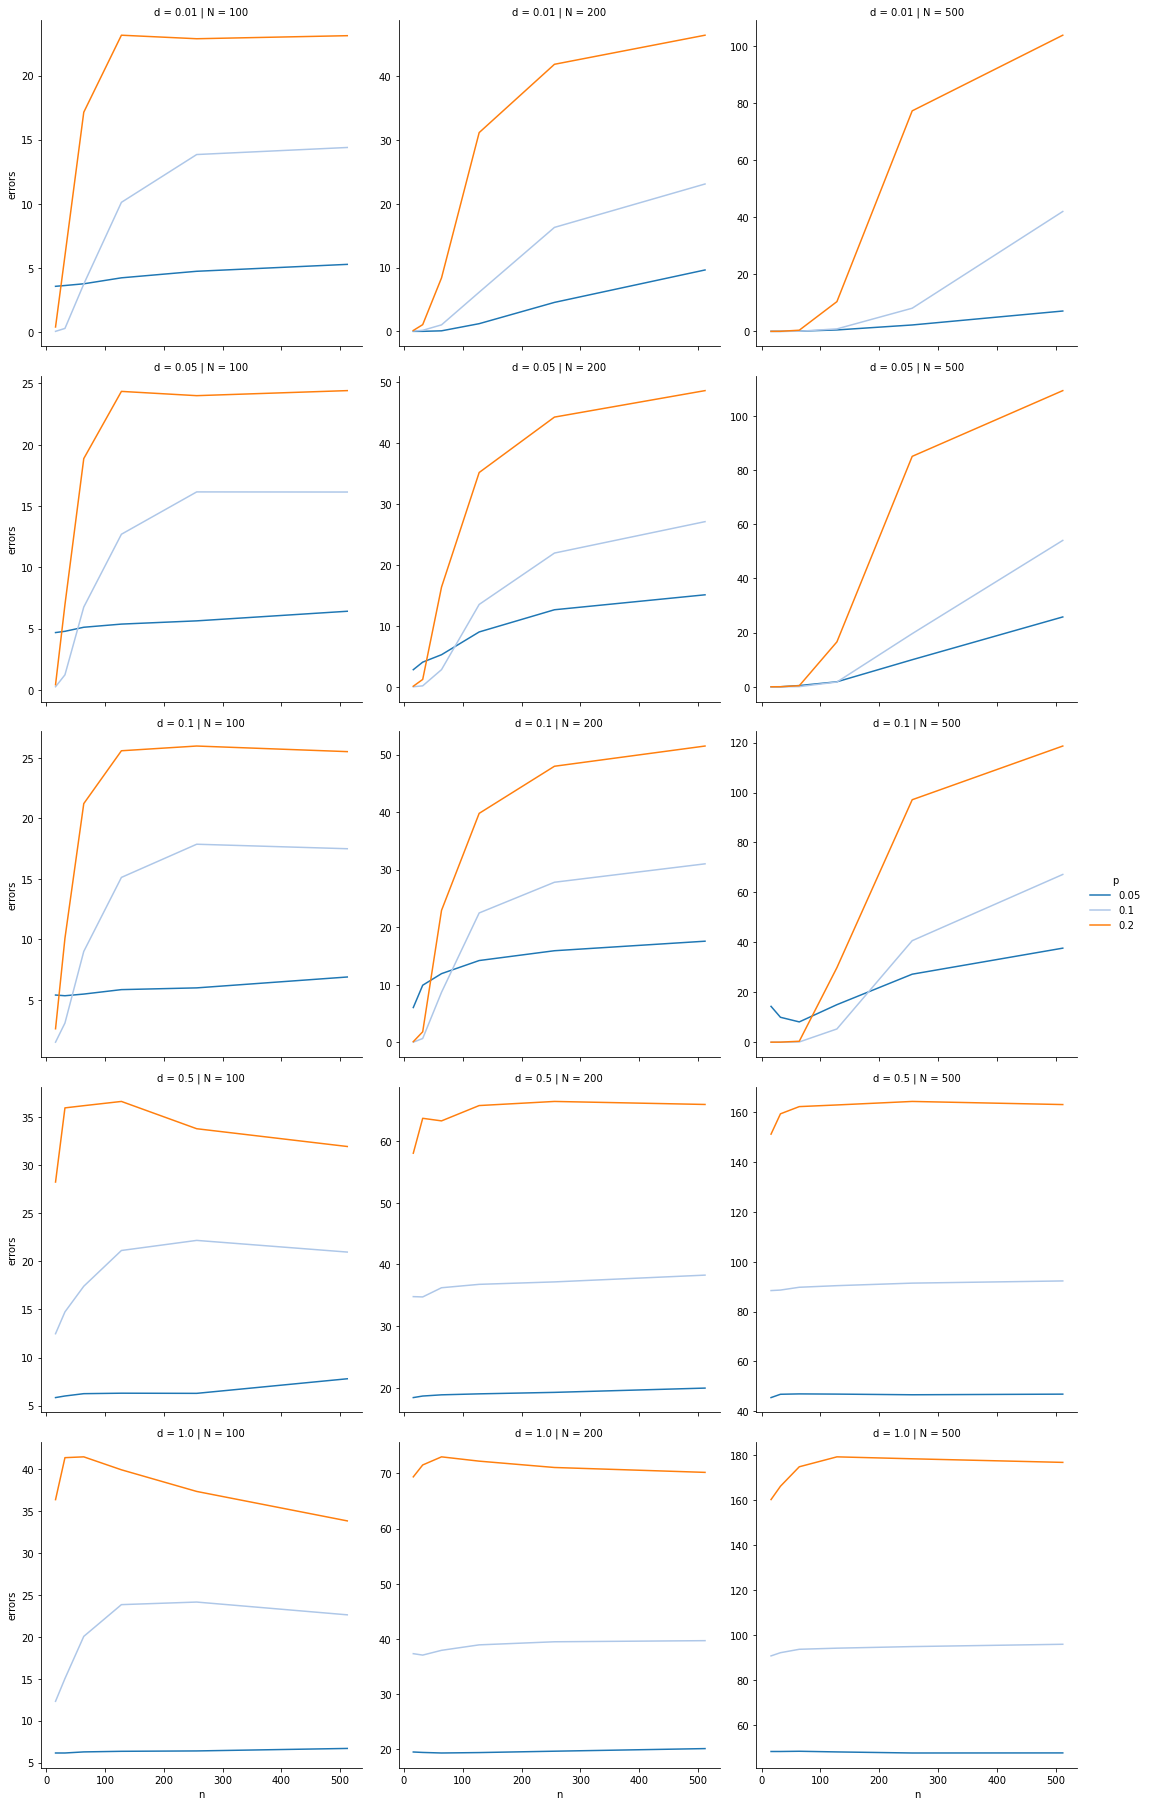

In [73]:
g = sns.relplot(x='n', y='errors', col='N', row='d', hue='p', data=Ug_err, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False}) #, ci=None)
# g.axes[0,0].set_yscale('log')

# test with N=300,400

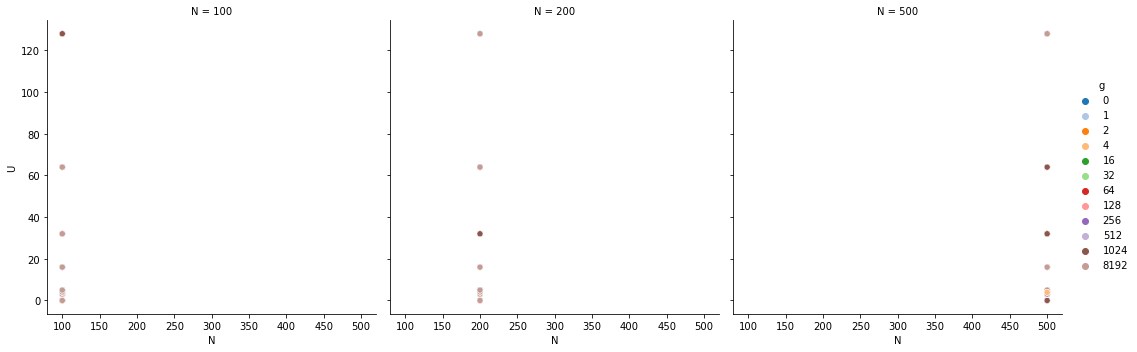

In [25]:
g = sns.relplot(x='N', y='U', hue='g', data=df_N, col="N", kind='scatter', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

### Success of U & g by N

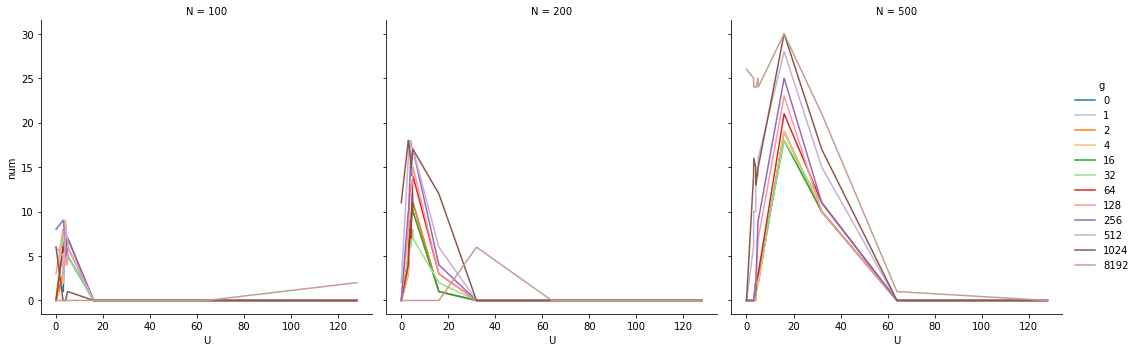

In [26]:
g = sns.relplot(x='U', y='num', hue='g', data=df_N, col="N", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

### Success of U & g by p

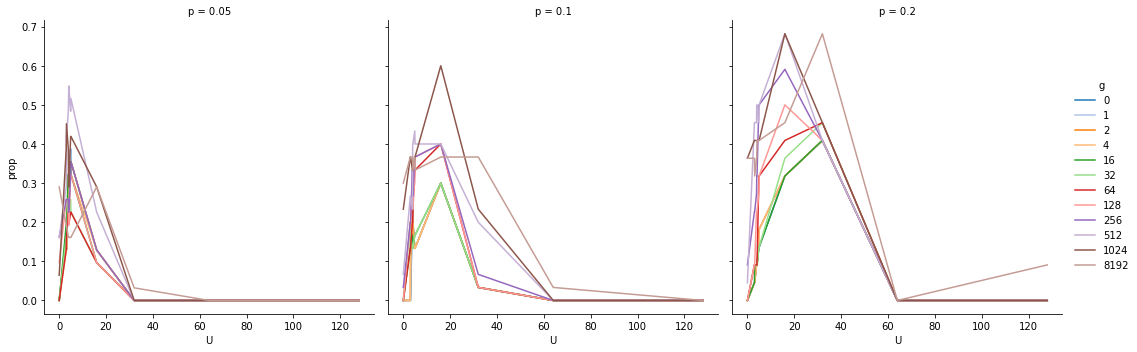

In [27]:
g = sns.relplot(x='U', y='prop_all', hue='g', data=df_p, col="p", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

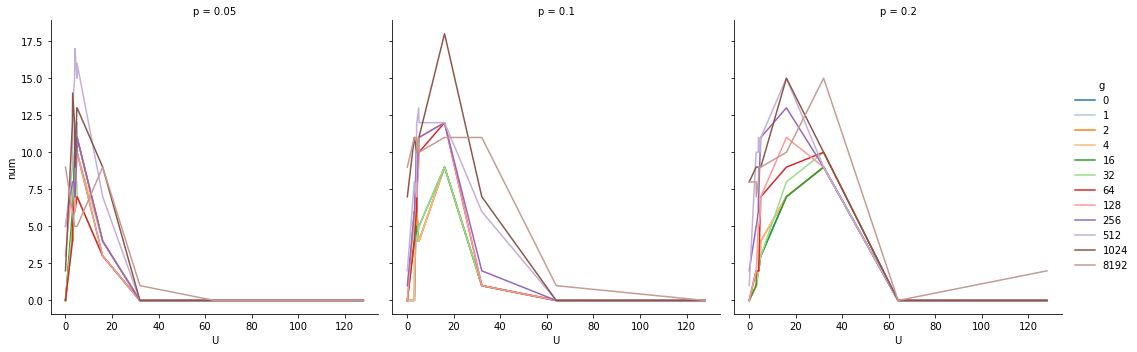

In [28]:
g = sns.relplot(x='U', y='num', hue='g', data=df_p, col="p", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

In [145]:
# def do_stat(df_n, N, p, n, d, delta=1):

#     res = {}
#     totals = {}

#     for i in range(len(N)):
#         for l in range(len(p)):
#             res[N[i],p[l]] = {}
#             totals[N[i],p[l]] = 0
#             for j in range(len(n)):
#                 for k in range(len(d)):
#                     df_ijkl = df_n[(df_n.N == N[i]) & (df_n.n == n[j]) & (df_n.d == d[k]) & (df_n.p == p[l])]
#                     assert len(df_ijkl) == len(U)*len(g), (df_ijkl, N[i], n[j], d[k], p[l])
#     #                 if not df_ijkl.empty:
#                     ind = np.argmin(df_ijkl['errors'])
#                     err = df_ijkl.iloc[ind]['errors']
#                     df_filt = df_ijkl[(df_ijkl.errors < err + delta)]
#                     if err < min(0.9*N[i]*p[l], N[i]*d[k]):
#                         totals[N[i],p[l]] = totals[N[i],p[l]] + 1

#                         for row in df_filt.itertuples():
#                             if (row.U,row.g) not in res[row.N,row.p]:
#                                 res[row.N,row.p][row.U,row.g] = 1
#                             else:
#                                 res[row.N,row.p][row.U,row.g] = res[row.N,row.p][row.U,row.g] + 1 


#     return(res,totals)